# Master Thesis Script
## Estimate retweet frequencies of politicians

From a dataset available online on US Congress Members of the 116th Congress, it is possible to estimate retweet frequency for a given timeframe for each congress member. This works better than using our original dataset because it is unclear in that dataset, in which time period each politician was active. Thus, tweet frequency per day can be estimated much closer here.
As this is count data, both a Poisson and Negative Binomial distribution are fit to the data. This distribution is used later in the ABM to trigger an according number of retweets per politician per timestep.

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [3]:
df = pd.read_csv(r'Congress_Tweet_Frequency.csv')  

In [4]:
df_twitter = df[(df['Platform'] == "twitter")] 

In [4]:
df_twitter

,Unnamed: 0,Platform,Party,Bioguide ID,Number of Active Accounts,Max Total Followers,Start of Term,End of Term,First Post,Last Post,Total Posts,Average Post Favorites/Reactions,Average Post Retweets/Shares,First_Post,Last_Post,Total_Posts,Time_Period,Posts_per_hour,Binned_posts_per_hour
0,540,twitter,R,A000055,1,29492.0,2019-01-01,NaN,2019-01-08,2020-05-30,590.0,85,38,2019-01-08,2020-05-30,590.0,508,0.048392,"(0.00159, 0.17]"
1,541,twitter,R,A000360,2,133668.0,2019-01-01,NaN,2019-01-02,2020-05-31,2356.0,135,33,2019-01-02,2020-05-31,2356.0,515,0.190615,"(0.17, 0.336]"
2,542,twitter,(R),A000367,3,444875.0,2019-01-01,NaN,2019-01-01,2020-05-31,2368.0,7506,1703,2019-01-01,2020-05-31,2368.0,516,0.191214,"(0.17, 0.336]"
3,543,twitter,R,A000369,2,17779.0,2019-01-01,NaN,2019-01-03,2020-05-06,108.0,34,10,2019-01-03,2020-05-06,108.0,489,0.009202,"(0.00159, 0.17]"
4,544,twitter,D,A000370,2,23703.0,2019-01-01,NaN,2019-01-01,2020-05-31,3196.0,68,16,2019-01-01,2020-05-31,3196.0,516,0.258075,"(0.17, 0.336]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1073,twitter,R,Y000033,2,22251.0,2019-01-01,NaN,2019-01-03,2020-05-31,469.0,15,5,2019-01-03,2020-05-31,469.0,514,0.038019,"(0.00159, 0.17]"
534,1074,twitter,D,Y000062,1,47755.0,2019-01-01,NaN,2019-01-01,2020-05-30,896.0,773,191,2019-01-01,2020-05-30,896.0,515,0.072492,"(0.00159, 0.17]"
535,1075,twitter,R,Y000064,2,66224.0,2019-01-01,NaN,2019-01-02,2020-05-30,2051.0,116,54,2019-01-02,2020-05-30,2051.0,514,0.166261,"(0.00159, 0.17]"
536,1076,twitter,R,Y000065,2,39257.0,2019-01-01,NaN,2019-01-04,2020-05-30,816.0,275,199,2019-01-04,2020-05-30,816.0,512,0.066406,"(0.00159, 0.17]"


In [5]:
print(len(df_twitter))

538


In [6]:
df_twitter["First_Post"] = df_twitter["First Post"]
df_twitter["Last_Post"] = df_twitter["Last Post"]
df_twitter["Total_Posts"] = df_twitter["Total Posts"]

In [7]:
df_twitter

,Unnamed: 0,Platform,Party,Bioguide ID,Number of Active Accounts,Max Total Followers,Start of Term,End of Term,First Post,Last Post,Total Posts,Average Post Favorites/Reactions,Average Post Retweets/Shares,First_Post,Last_Post,Total_Posts,Time_Period,Posts_per_hour,Binned_posts_per_hour
0,540,twitter,R,A000055,1,29492.0,2019-01-01,NaN,2019-01-08,2020-05-30,590.0,85,38,2019-01-08,2020-05-30,590.0,508,0.048392,"(0.00159, 0.17]"
1,541,twitter,R,A000360,2,133668.0,2019-01-01,NaN,2019-01-02,2020-05-31,2356.0,135,33,2019-01-02,2020-05-31,2356.0,515,0.190615,"(0.17, 0.336]"
2,542,twitter,(R),A000367,3,444875.0,2019-01-01,NaN,2019-01-01,2020-05-31,2368.0,7506,1703,2019-01-01,2020-05-31,2368.0,516,0.191214,"(0.17, 0.336]"
3,543,twitter,R,A000369,2,17779.0,2019-01-01,NaN,2019-01-03,2020-05-06,108.0,34,10,2019-01-03,2020-05-06,108.0,489,0.009202,"(0.00159, 0.17]"
4,544,twitter,D,A000370,2,23703.0,2019-01-01,NaN,2019-01-01,2020-05-31,3196.0,68,16,2019-01-01,2020-05-31,3196.0,516,0.258075,"(0.17, 0.336]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1073,twitter,R,Y000033,2,22251.0,2019-01-01,NaN,2019-01-03,2020-05-31,469.0,15,5,2019-01-03,2020-05-31,469.0,514,0.038019,"(0.00159, 0.17]"
534,1074,twitter,D,Y000062,1,47755.0,2019-01-01,NaN,2019-01-01,2020-05-30,896.0,773,191,2019-01-01,2020-05-30,896.0,515,0.072492,"(0.00159, 0.17]"
535,1075,twitter,R,Y000064,2,66224.0,2019-01-01,NaN,2019-01-02,2020-05-30,2051.0,116,54,2019-01-02,2020-05-30,2051.0,514,0.166261,"(0.00159, 0.17]"
536,1076,twitter,R,Y000065,2,39257.0,2019-01-01,NaN,2019-01-04,2020-05-30,816.0,275,199,2019-01-04,2020-05-30,816.0,512,0.066406,"(0.00159, 0.17]"


In [8]:
start_date_lst = df_twitter.First_Post.values.tolist()
end_date_lst = df_twitter.Last_Post.values.tolist()

In [9]:
start_date_lst_dt = []
for date in start_date_lst:
    datetime_object = datetime.strptime(date, '%Y-%m-%d')
    start_date_lst_dt.append(datetime_object)

In [10]:
end_date_lst_dt = []
for date in end_date_lst:
    datetime_object = datetime.strptime(date, '%Y-%m-%d')
    end_date_lst_dt.append(datetime_object)

In [11]:
time_period = []
for start, end in zip(start_date_lst_dt, end_date_lst_dt):
    diff = end - start
    diff_days = diff.days
    time_period.append(diff_days)

In [12]:
se = pd.Series(time_period)
df_twitter['Time_Period'] = se.values

In [13]:
df_twitter["Posts_per_hour"] = (df_twitter["Total_Posts"] / df_twitter["Time_Period"])/24

In [14]:
df_twitter

,Unnamed: 0,Platform,Party,Bioguide ID,Number of Active Accounts,Max Total Followers,Start of Term,End of Term,First Post,Last Post,Total Posts,Average Post Favorites/Reactions,Average Post Retweets/Shares,First_Post,Last_Post,Total_Posts,Time_Period,Posts_per_hour,Binned_posts_per_hour
0,540,twitter,R,A000055,1,29492.0,2019-01-01,NaN,2019-01-08,2020-05-30,590.0,85,38,2019-01-08,2020-05-30,590.0,508,0.048392,"(0.00159, 0.17]"
1,541,twitter,R,A000360,2,133668.0,2019-01-01,NaN,2019-01-02,2020-05-31,2356.0,135,33,2019-01-02,2020-05-31,2356.0,515,0.190615,"(0.17, 0.336]"
2,542,twitter,(R),A000367,3,444875.0,2019-01-01,NaN,2019-01-01,2020-05-31,2368.0,7506,1703,2019-01-01,2020-05-31,2368.0,516,0.191214,"(0.17, 0.336]"
3,543,twitter,R,A000369,2,17779.0,2019-01-01,NaN,2019-01-03,2020-05-06,108.0,34,10,2019-01-03,2020-05-06,108.0,489,0.009202,"(0.00159, 0.17]"
4,544,twitter,D,A000370,2,23703.0,2019-01-01,NaN,2019-01-01,2020-05-31,3196.0,68,16,2019-01-01,2020-05-31,3196.0,516,0.258075,"(0.17, 0.336]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1073,twitter,R,Y000033,2,22251.0,2019-01-01,NaN,2019-01-03,2020-05-31,469.0,15,5,2019-01-03,2020-05-31,469.0,514,0.038019,"(0.00159, 0.17]"
534,1074,twitter,D,Y000062,1,47755.0,2019-01-01,NaN,2019-01-01,2020-05-30,896.0,773,191,2019-01-01,2020-05-30,896.0,515,0.072492,"(0.00159, 0.17]"
535,1075,twitter,R,Y000064,2,66224.0,2019-01-01,NaN,2019-01-02,2020-05-30,2051.0,116,54,2019-01-02,2020-05-30,2051.0,514,0.166261,"(0.00159, 0.17]"
536,1076,twitter,R,Y000065,2,39257.0,2019-01-01,NaN,2019-01-04,2020-05-30,816.0,275,199,2019-01-04,2020-05-30,816.0,512,0.066406,"(0.00159, 0.17]"


In [15]:
df_twitter["Posts_per_hour"].max()
df_twitter["Posts_per_hour"].min()

0.0032552083333333335

In [16]:
posts_per_hr = df_twitter.Posts_per_hour.values.tolist()

In [17]:
binned = pd.cut(np.array(posts_per_hr), 10)

In [18]:
se = pd.Series(binned)
df_twitter['Binned_posts_per_hour'] = se.values

In [19]:
df_twitter

,Unnamed: 0,Platform,Party,Bioguide ID,Number of Active Accounts,Max Total Followers,Start of Term,End of Term,First Post,Last Post,Total Posts,Average Post Favorites/Reactions,Average Post Retweets/Shares,First_Post,Last_Post,Total_Posts,Time_Period,Posts_per_hour,Binned_posts_per_hour
0,540,twitter,R,A000055,1,29492.0,2019-01-01,NaN,2019-01-08,2020-05-30,590.0,85,38,2019-01-08,2020-05-30,590.0,508,0.048392,"(0.00159, 0.17]"
1,541,twitter,R,A000360,2,133668.0,2019-01-01,NaN,2019-01-02,2020-05-31,2356.0,135,33,2019-01-02,2020-05-31,2356.0,515,0.190615,"(0.17, 0.336]"
2,542,twitter,(R),A000367,3,444875.0,2019-01-01,NaN,2019-01-01,2020-05-31,2368.0,7506,1703,2019-01-01,2020-05-31,2368.0,516,0.191214,"(0.17, 0.336]"
3,543,twitter,R,A000369,2,17779.0,2019-01-01,NaN,2019-01-03,2020-05-06,108.0,34,10,2019-01-03,2020-05-06,108.0,489,0.009202,"(0.00159, 0.17]"
4,544,twitter,D,A000370,2,23703.0,2019-01-01,NaN,2019-01-01,2020-05-31,3196.0,68,16,2019-01-01,2020-05-31,3196.0,516,0.258075,"(0.17, 0.336]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1073,twitter,R,Y000033,2,22251.0,2019-01-01,NaN,2019-01-03,2020-05-31,469.0,15,5,2019-01-03,2020-05-31,469.0,514,0.038019,"(0.00159, 0.17]"
534,1074,twitter,D,Y000062,1,47755.0,2019-01-01,NaN,2019-01-01,2020-05-30,896.0,773,191,2019-01-01,2020-05-30,896.0,515,0.072492,"(0.00159, 0.17]"
535,1075,twitter,R,Y000064,2,66224.0,2019-01-01,NaN,2019-01-02,2020-05-30,2051.0,116,54,2019-01-02,2020-05-30,2051.0,514,0.166261,"(0.00159, 0.17]"
536,1076,twitter,R,Y000065,2,39257.0,2019-01-01,NaN,2019-01-04,2020-05-30,816.0,275,199,2019-01-04,2020-05-30,816.0,512,0.066406,"(0.00159, 0.17]"


<AxesSubplot: >

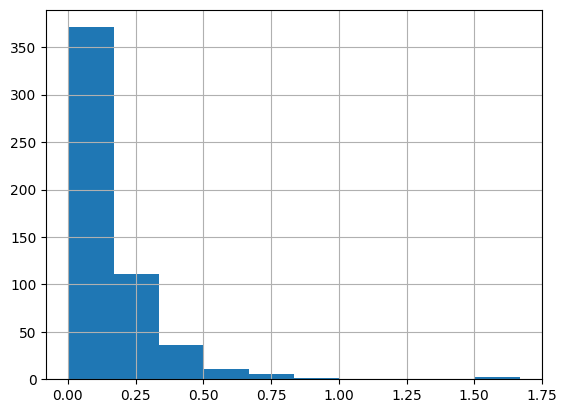

In [20]:
df_twitter["Posts_per_hour"].hist()

In [21]:
df_twitter.to_csv('Congress_Tweet_Frequency.csv')  

In [22]:
df = pd.read_csv(r'C:\Users\Simmendinger\OneDrive - bwedu/Dokumente/Konstanz SEDS Data/4. Semester/Master Thesis/Data/Additional Data/appendix-csvs/Congress_Tweet_Frequency.csv')  

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Simmendinger\\OneDrive - bwedu/Dokumente/Konstanz SEDS Data/4. Semester/Master Thesis/Data/Additional Data/appendix-csvs/Congress_Tweet_Frequency.csv'

In [5]:
df

,Unnamed: 0,Platform,Party,Bioguide ID,Number of Active Accounts,Max Total Followers,Start of Term,End of Term,First Post,Last Post,Total Posts,Average Post Favorites/Reactions,Average Post Retweets/Shares,First_Post,Last_Post,Total_Posts,Time_Period,Posts_per_hour,Binned_posts_per_hour
0,540,twitter,R,A000055,1,29492.0,2019-01-01,NaN,2019-01-08,2020-05-30,590.0,85,38,2019-01-08,2020-05-30,590.0,508,0.048392,"(0.00159, 0.17]"
1,541,twitter,R,A000360,2,133668.0,2019-01-01,NaN,2019-01-02,2020-05-31,2356.0,135,33,2019-01-02,2020-05-31,2356.0,515,0.190615,"(0.17, 0.336]"
2,542,twitter,(R),A000367,3,444875.0,2019-01-01,NaN,2019-01-01,2020-05-31,2368.0,7506,1703,2019-01-01,2020-05-31,2368.0,516,0.191214,"(0.17, 0.336]"
3,543,twitter,R,A000369,2,17779.0,2019-01-01,NaN,2019-01-03,2020-05-06,108.0,34,10,2019-01-03,2020-05-06,108.0,489,0.009202,"(0.00159, 0.17]"
4,544,twitter,D,A000370,2,23703.0,2019-01-01,NaN,2019-01-01,2020-05-31,3196.0,68,16,2019-01-01,2020-05-31,3196.0,516,0.258075,"(0.17, 0.336]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1073,twitter,R,Y000033,2,22251.0,2019-01-01,NaN,2019-01-03,2020-05-31,469.0,15,5,2019-01-03,2020-05-31,469.0,514,0.038019,"(0.00159, 0.17]"
534,1074,twitter,D,Y000062,1,47755.0,2019-01-01,NaN,2019-01-01,2020-05-30,896.0,773,191,2019-01-01,2020-05-30,896.0,515,0.072492,"(0.00159, 0.17]"
535,1075,twitter,R,Y000064,2,66224.0,2019-01-01,NaN,2019-01-02,2020-05-30,2051.0,116,54,2019-01-02,2020-05-30,2051.0,514,0.166261,"(0.00159, 0.17]"
536,1076,twitter,R,Y000065,2,39257.0,2019-01-01,NaN,2019-01-04,2020-05-30,816.0,275,199,2019-01-04,2020-05-30,816.0,512,0.066406,"(0.00159, 0.17]"


We want to fit the frequency of posts (per some time dimension, e.g. hours or day) to a distribution.
As we have count data within a specified timeframe, we either use the Poisson or Negative Binomial distribution. We fit both models to the data, plot them against the data and evaluate the better fit based on both visualisation and the likelihood ratio test.

Sources used for this code:
- https://anton-granik.medium.com/fitting-and-visualizing-a-negative-binomial-distribution-in-python-3cc27fbc7ecf
- https://timeseriesreasoning.com/contents/negative-binomial-regression-model/
- https://timeseriesreasoning.com/contents/poisson-regression-model/

In [6]:
posts_per_hr = df.Posts_per_hour.values.tolist()
pph_arr = np.array(posts_per_hr)

In [7]:
ppd_arr =[p*24 for p in pph_arr]

In [37]:
print(ppd_arr)

[1.161417322834644, 4.574757281553398, 4.589147286821705, 0.22085889570551998, 6.1937984496124034, 0.7309941520467815, 1.212475633528265, 2.9394531249999982, 2.2315175097276265, 3.6439688715953302, 3.932038834951457, 2.491262135922329, 0.5088062622309193, 1.6848249027237339, 4.317120622568092, 5.304263565891473, 4.251937984496124, 0.5905349794238665, 4.612403100775193, 3.4990253411306043, 6.2906976744186025, 2.449612403100775, 1.7743190661478583, 1.1087378640776686, 0.9202334630350175, 1.7011718749999991, 9.044660194174757, 2.365048543689319, 2.787937743190661, 1.465886939571149, 5.323643410852711, 5.4651162790697665, 8.434108527131784, 2.2403100775193785, 2.61089494163424, 3.570038910505836, 5.401941747572815, 2.6077669902912604, 7.862403100775194, 9.170873786407766, 2.7431906614785984, 15.306201550387597, 1.3891050583657585, 5.62984496124031, 1.481262327416172, 9.80813953488372, 7.174418604651164, 3.9806201550387597, 0.8031189083820647, 16.662790697674417, 1.6459143968871577, 3.05038

In [8]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import nbinom
import statsmodels.api as sm
from scipy.stats import poisson

warnings.filterwarnings("ignore")

In [43]:
X = np.ones_like(ppd_arr)
model = sm.NegativeBinomial(ppd_arr,X)
#res = sm.NegativeBinomial(ppd_arr,X).fit(start_params=[1,1])
res = sm.GLM(ppd_arr, X,family=sm.families.NegativeBinomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  538
Model:                            GLM   Df Residuals:                      537
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.4
Date:                Sun, 20 Aug 2023   Deviance:                       287.05
Time:                        11:57:47   Pearson chi2:                     432.
No. Iterations:                     5   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3704      0.048     28.385      0.0

In [46]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  538
Model:                            GLM   Df Residuals:                      537
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.4
Date:                Sun, 20 Aug 2023   Deviance:                       287.05
Time:                        11:58:01   Pearson chi2:                     432.
No. Iterations:                     5   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3704      0.048     28.385      0.000       1.276       1.465
==============================================================================
"""

In [47]:
# deviance/df_resid
print(287.05/537)

0.5345437616387337


In [11]:
mu = np.exp(res.params[0])
p = 1/(1+np.exp(res.params[0])*res.params[1])
n = np.exp(res.params[0]*p/(1-p))
print(mu, n, p)

3.936844830398229 2.3050360376308916 0.378646761682241


In [12]:
import numpy as np

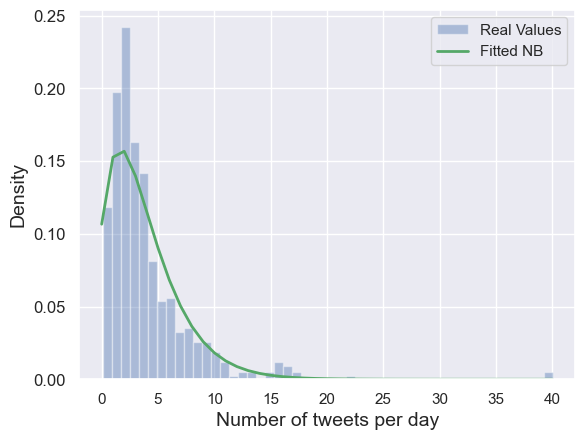

In [23]:
x_plot = np.linspace(0,40, 41)
sns.set_theme()
ax = sns.distplot(ppd_arr, kde = False, norm_hist = True, label = "Real Values")
ax.plot(x_plot, nbinom.pmf(x_plot, n, p), "g-", lw=2, label = "Fitted NB")
leg = ax.legend()
#plt.title("Real vs. Fitted NB Distributions")
# Set x-axis label with increased font size
plt.xlabel('Number of tweets per day', fontsize=14)

# Set y-axis label with increased font size
plt.ylabel('Density', fontsize=14)

# Set tick labels font size
plt.yticks(fontsize=12)


# Save the figure as a vectorized image (SVG format)
plt.savefig('NB_Distrib_TweetFrequency.svg', format='svg')

# Display the plot
plt.show()

In [ ]:
# now compare negative binomial model to Poisson model to measure goodness of fit, 
# by conducting the likelihood-ratio test

In [14]:
X = np.ones_like(ppd_arr)
exog = sm.add_constant(X)
poisson_model = sm.GLM(ppd_arr, X, family=sm.families.Poisson())
result = poisson_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  538
Model:                            GLM   Df Residuals:                      537
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1528.2
Date:                Sun, 20 Aug 2023   Deviance:                       1477.4
Time:                        11:35:54   Pearson chi2:                 2.13e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3704      0.022     63.068      0.0

In [15]:
mu = np.exp(result.params[0])


Text(0.5, 1.0, 'Real vs. Fitted Poisson Distributions')

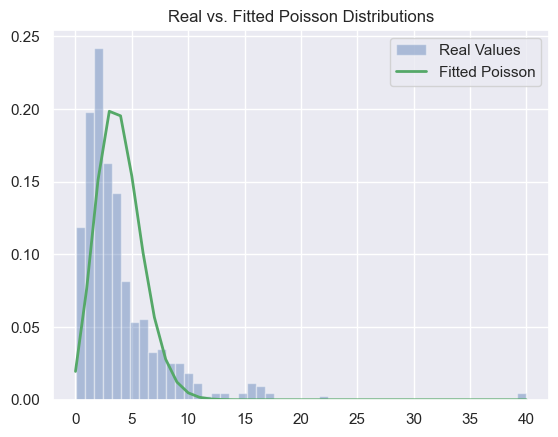

In [16]:
x_plot = np.linspace(0,40, 41)
sns.set_theme()
ax = sns.distplot(ppd_arr, kde = False, norm_hist = True, label = "Real Values")
ax.plot(x_plot, poisson.pmf(x_plot, mu), "g-", lw=2, label = "Fitted Poisson")
leg = ax.legend()
plt.title("Real vs. Fitted Poisson Distributions")

In [17]:
log_lik_NB = 1289.0
log_lik_Pois = 1528.2
likelihood_ratio = 2*(log_lik_Pois - log_lik_NB)
print(likelihood_ratio)

478.4000000000001


This value at 478.4 is vastly greater than the critical value of χ2(1) at the 1% significance level which is 6.635

In [48]:
# likelihood ratio test
print(2*(1528.2-1338.4))

379.5999999999999


In [ ]:
# this value is much greater